# Implementing a neural network with a single hidden layer

In this assignment you will learn to implement a neural network with a single hidden layer and apply it on a toy dataset. You will be using this neural networks to perform binary classification. In a binary classification problem, each input belongs to one of two classes, say 0 or 1, and the goal is to predict the correct class of each input. This assignment will help you understand how backpropagation is done in neural networks. This notebook is based on the material from: <br/>
http://cs231n.github.io/neural-networks-case-study/ <br/>
https://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html <br/>
contribution from <a href="https://github.com/Abhi001vj"> Abhilash V Jayakumar </a> 


#### Instructions
-  Do not use any additional libraries other than what is already specified below
-  Do not use loops in your code, use numpy for vectorized implementation
-  Do not edit "Expected output" markdown cells
-  Use https://forum.mulearn.org/ for asking any questions you may have about this assignment


### 1. Import Libraries
For this assignment we will import the following libraries:

In [2]:
#Checking out the repository to make it work with colab
!git clone https://github.com/AKSHAYA8219/ai-ml-assignments.git

Cloning into 'ai-ml-assignments'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 178 (delta 22), reused 40 (delta 12), pack-reused 124
Receiving objects: 100% (178/178), 918.89 KiB | 13.71 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('ai-ml-assignments')
from utils import utils
from utils.utils import sigmoid

### 2. Creating the data
Let us create the same simple dataset that we used for logistic regression assignment and visualise it.

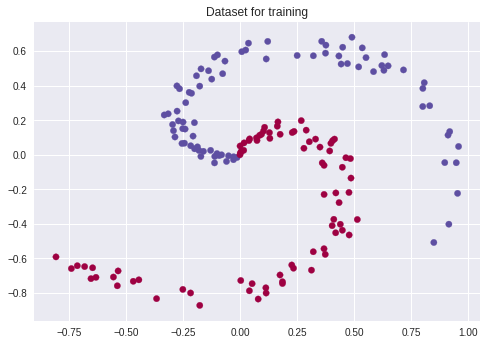

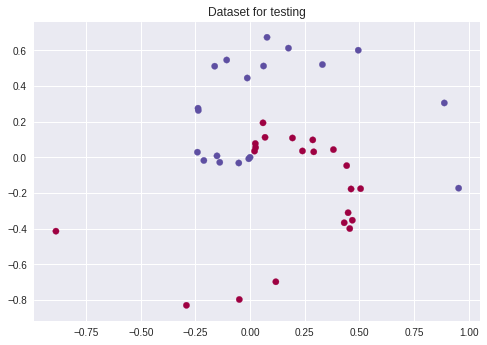

In [4]:
X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()


###  3. Data representation and parameters
Assuming there are $m$ training samples, the pair $(x^{(i)}, \hat{y}^{(i)})$ denote the $i^{th}$ training sample. Each training sample consists of $n$ features denoted by $x^{(i)}$ and the correponding class label $\hat{y}^{(i)}$. For this dataset, we use two features, hence $n=2$. For each training sample, the features $x^{(i)}$ can be thought of as an $n\times1$ column vector. 

For vectorized operations, we arrange the column vectors corresponding to all the features of the training samples in the form of a $n \times m$ matrix $X$ and the ground truth class labels as a $1 \times m$ row vector $\hat{y}$. These are same as the conventions we followed in the logistic regression assignment.

For this exercise, we will create a simple neural network having only one hidden layer with five neurons as shown below. The input layer has two nodes since the number of features we use is $n=2$. The output layer has a single neuron since this neural network is used for binary classification. Let $n_x$, $n_h$, and $n_y$ denote the number of nodes in the input layer, the hidden layer, and the output layer respectively. In this exercise, $n_x = 2$, $n_h = 5$ and $n_y = 1$.
<img src="https://github.com/AKSHAYA8219/ai-ml-assignments/blob/master/SimpleNeuralNetwork/nn.png?raw=1" style="width:600px;height:300px;">

Each edge of the neural network has an associated weight. The weights corresponding to the edges between the input layer and the hidden layer can be represented as a $n_h \times n_x$ matrix $W_1$. Similarly, a $n_y \times n_h$ matrix $W_2$ represents the weights corresponding to the edges between the hidden layer and the output layer. The bias parameters for the nodes of the hidden layer and output layer are denoted by $b_1$ and $b_2$ respectively.

### 4. Create Weight and Bias variables
Use the cell below to create the weight parameters $W_1$ and $W_2$ and initialise them with small random values. Similarly create bias parameters $b_1$ and $b_2$ and initialise them with zeros.


In [0]:
def create_params(n_x, n_h, n_y):
    # Create the weight and bias parameters
    
    #Arguments
    #    n_x : size of the input layer
    #    n_h : size of the hidden layer
    #    n_y : size of the output layer
    
    # Return values
    #    parameter dictionary that contains the randomly generated weights and parameters
    
    
    # Set a seed for the random number generator to reproduce the results
    np.random.seed(2)
    
    # The parameters will be stored in a python dictionary for convenience.
    # Initialize the dictionary
    param_dict = {}
    
    # Create a small set of random values as the weight and bias parameters
    param_dict['W1'] = np.random.randn(n_h, n_x) * 0.01
    param_dict['b1'] = np.zeros((n_h,1))
    param_dict['W2'] = np.random.randn(n_y, n_h) * 0.01
    param_dict['b2'] = np.zeros((n_y,1))
    
    return param_dict

In [0]:
param_dict = create_params(2,5,1)


### 5. Implement forward propagation
Using the parameters $W_1$, $W_2$, $b_1$, and $b_2$, you have to implement the forward propgation and calculate the values for:<br/>
$Z^{[1]} = W_1 \cdot X + b_1$<br/>
$A^{[1]} = tanh(Z^{[1]})$<br/>
$Z^{[2]} = W_2 \cdot A^{[1]} + b_2$<br/>
$A^{[2]} = sigmoid(Z^{[2]})$ <br/>
$L = -\frac{1}{m} (\hat Y log (A^{[2]}) + (1-\hat Y)log(1-A^{[2]}))$


In [0]:
def forward_propagate(X,yhat, param_dict):
    # Implement forward propagation using the equations above without using any loops
    
    # Arguments:
    #    X             : n features of m training samples represented as an nxm matrix
    #    yhat          : the groundtruth values for the m training samples represented as an 1xm matrix
    #    param_dict    : the parameter dictionary containing the weights and biases
    #
    # Return values:
    #    loss          : the loss L calculated according to the formula above
    #    cached_data   : dictionary storing the values of Z[1], A[1], Z[2], and A[2] calculated according 
    #                    to the formula above
    #    
    
    
    # We need the values of  Z[1], A[1], Z[2], and A[2] calculated during the forward pass later for the backward
    # pass. Create a dictionary cached_data for storing the values.
    cached_data = {}
    
    
    # Calculate the values of Z[1], A[1], Z[2], and A[2] according to the formula above using vectorized operation
    cached_data['Z1']  = np.dot(param_dict['W1'],X)+param_dict['b1']
    cached_data['A1']  = np.tanh(cached_data['Z1'])
    cached_data['Z2']  = np.dot(param_dict['W2'],cached_data['A1'])+param_dict['b2']
    cached_data['A2']  = sigmoid(cached_data['Z2'])
    
    # Compute the loss using the formula above
    loss = -1*(np.sum(((yhat*np.log(cached_data['A2']))+(1-yhat)*np.log(1-cached_data['A2'])))/X.shape[1])
    
    return loss, cached_data

**Let us test if the forward propagation is implemented correctly**

We will use a few samples from the training set and check if the forward propagation calculates the correct values. Verify that the activation and loss values computed by the forward propagation you implemented matches the expected values below.

In [9]:
# Choose three samples of the training data for verification
# Do not change these samples since the expected values are calculated for these samples.
X = X_train[:,:3]
yhat = yhat_train[:,:3]

loss, cached_data = forward_propagate(X,yhat, param_dict)
print ("Actiavtion 1:")
print (cached_data['A1'])
print ("Activation 2:")
print (cached_data['A2'])
print "Loss:"
print loss


Actiavtion 1:
[[-0.00080023 -0.0032566   0.00072534]
 [-0.00043771 -0.02647377  0.01068074]
 [-0.00458275 -0.0109709   0.00095653]
 [-0.00152916  0.01059315 -0.00561624]
 [-0.00348696 -0.00437891 -0.00092487]]
Activation 2:
[[0.49999549 0.49980716 0.50007676]]
Loss:
0.6932215933428393


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>
<tr style="text-align: left;"><td>Activation 1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[-0.00080023 -0.0032566   0.00072534]<br/>
[-0.00043771 -0.02647377  0.01068074]<br/>
[-0.00458275 -0.0109709   0.00095653]<br/>
[-0.00152916  0.01059315 -0.00561624]<br/>
[-0.00348696 -0.00437891 -0.00092487]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>Activation 2:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ 0.49999549  0.49980716  0.50007676]]
<td/></tr>
<tr style="text-align: left;"><td>Loss:<br/></td></tr>
<tr style="text-align: left;"><td>0.693221593345<br/></td></tr>
</tbody>  </table>

### 6. Implement backward propagation
Now comes the more difficult backward propagation where you have to compute the derivative with respect to the loss function. You need to implement the following in a vectorised manner:

$dZ^{[2]}  = A^{[2]} - \hat Y$<br/>
$dW^{[2]}  = \frac{1}{m} dZ^{[2]} \cdot {A^{[1]}}^{T}$<br/>
$db^{[2]}  = \frac{1}{m} \sum dZ^{[2]}$<br/>
$dZ^{[1]}  = (W_2^T \cdot dZ^{[2]}) * ( 1 - {A^{[1]}}^2)$<br/>
$dW^{[1]}  = \frac{1}{m} dZ^{[1]} \cdot  X^T$<br/>
$db^{[1]}  = \frac{1}{m} \sum dZ^{[1]}$<br/>


In [0]:
def backward_propagate(X,yhat, param_dict, cached_data):
    # Implement backward propagation using the equations above without using any loops
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    yhat : the groundtruth values for the m training samples represented as an 1xm matrix
    #    param_dict    : the parameter dictionary containing the weights and biases
    #
    # Return values:
    #    dW1, db1, dW2, db2   : derivative of loss with respect to the weights and biases
    
    # Determine the number of trainining samples m from the shape of X
    m = X.shape[1] 
    
    # Calculate the following using the equations above without using any loops: 
    #    dZ2 = dL/dZ2, 
    #    dW2 = dL/dW2,
    #    db2 = dL/db2
    #    dZ1 = dL/dZ1
    #    dW1 = dL/dW1
    #    db1 = dL/db1
    
    dZ2 = cached_data['A2']-yhat
    dW2 = (np.dot(dZ2,cached_data['A1'].T))/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.multiply(np.dot(param_dict['W2'].T,dZ2),1-np.square(cached_data['A1']))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    return dW1, db1, dW2, db2


**Let us test if the backward propagation is implemented correctly**

Verify that the values computed by the backward propagation you implemented matches the expected values below.

In [12]:
dW1, db1, dW2, db2 = backward_propagate(X,yhat, param_dict, cached_data)

# assertions on size of dws and dbs
print "dW1:"
print(dW1)
print "db1:"
print(db1)

print "dW2:"
print(dW2)
print "db2:"
print(db2)

dW1:
[[-4.23821268e-04  3.09413239e-04]
 [-1.75953592e-03  1.28494443e-03]
 [-3.19189753e-05  2.33030634e-05]
 [ 8.59036588e-04 -6.27176659e-04]
 [-4.14289747e-04  3.02452402e-04]]
db1:
[[-9.19302116e-04]
 [-3.81815459e-03]
 [-6.92420754e-05]
 [ 1.86339492e-03]
 [-8.98640161e-04]]
dW2:
[[ 0.00028873  0.00256119  0.00090601 -0.00108517  0.00030307]]
db2:
[[-0.16670687]]


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>
<tr style="text-align: left;"><td>dW1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ -4.23821293e-04   3.09413235e-04]<br/>
 [ -1.75953603e-03   1.28494442e-03]<br/>
 [ -3.19189772e-05   2.33030631e-05]<br/>
 [  8.59036640e-04  -6.27176650e-04]<br/>
 [ -4.14289772e-04   3.02452398e-04]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>db1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ -9.19302116e-04]<br/>
 [ -3.81815459e-03]<br/>
 [ -6.92420754e-05]<br/>
 [  1.86339492e-03]<br/>
 [ -8.98640161e-04]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>dW2:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ 0.00028873  0.00256119  0.00090601 -0.00108517  0.00030307]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>db2:<br/></td></tr>
<tr style="text-align: left;"><td>[[-0.16670687]]<br/></td></tr>
</tbody>  </table>


### 7. Training the network
With the forward and backward propagation implemented, we can now implement the fit function to train the network and  determine the values for the parameters. This is done using gradient descent rule: 
$ \theta = \theta - \alpha \cdot \frac{\partial L}{\partial \theta} $
where $\theta$ is a parameter that needs to be updated, $\frac{\partial L}{\partial \theta}$ is the gradient of  loss function $L$ with respect to $\theta$ and $\alpha$ is the learning rate.

In [0]:
def fit(X,yhat, lr = 0.5, numiter = 10000, display_loss = False):
    # Implement the fit fuction that determines optimal values for the parameters w and b using gradient descent.
    
    # Arguments:
    #    X            : n features of m training samples represented as an nxm matrix
    #    yhat         : the groundtruth values for the m training samples represented as an 1xm matrix
    #    lr           : learning rate for the gradient descent
    #    numiter      : number of iterations for running the gradient descent 
    #    display_loss : whether to display loss
    #
    # Return values:
    #    param_dict   : the weights and biases determined by the gradient descent
    
    # Determine the size of the input layer from the shape of X    
    n_x = X.shape[0]
    
    # Create param_dict for storing the weights and biases which are initialized with random values
    param_dict = create_params(n_x,5,1)
    
    # Iterate for numiter steps. This is the only place where you should be using a for loop.
    for i in range(numiter):
        # Calculate the values in cached_data and the loss using forward propagation
        loss, cached_data = forward_propagate(X,yhat, param_dict)
        
        # Calculate the derivates using backward propagation
        dw1,db1, dw2, db2 = backward_propagate(X,yhat, param_dict, cached_data)
        
        # Update the parameters by moving a small step (lr) in the opposite direction of the gradient
        param_dict['W1'] -= (lr*dw1)
        param_dict['b1'] -= (lr*db1)
        param_dict['W2'] -= (lr*dw2)
        param_dict['b2'] -= (lr*db2)
        
        if i % 1000 == 0 and display_loss == True:
            print(loss)
    return param_dict
        

**Let us train the model with the training data**

In [14]:
param_dict = fit(X_train,yhat_train, lr = 0.5, numiter = 10000, display_loss = True)

0.693091379275182
0.06948917473099187
0.03605629147112828
0.027851726546937895
0.023603615385479376
0.020858356708582985
0.01888267527050469
0.01736842090633206
0.01615821692527744
0.015161194901973114


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>

<tr style="text-align: left;"><td>
0.693091379275<br/>
0.0694891717794<br/>
0.0360562903116<br/>
0.0278517255979<br/>
0.0236036145033<br/>
0.0208583558305<br/>
0.018882674365<br/>
0.017368419956<br/>
0.0161582159196<br/>
0.0151611938343<br/>
<td/></tr>
</tbody></table>

**Experiment with the learning rate**

With lr = 0.5 you can see that the value of loss is drecreasing. 
To make the model learn faster, you can change the alpha, i.e., the learning rate, to a higher value (try what happens with alpha = 2), but if the learning rate is too high the loss may not converge (try what happens with alpha = 25). Experiment with the learning rate, observe the effect it has on the loss, and understand why it is happening.

### 8. Evaluate model 
Now that we have trained the model, let us evaluate the model on the test set. You need to implement the predict function which will take a set of inputs and the learnt parameters and return the predicted class (0 or 1) for each input. Refer the equiations in Section 5.

In [0]:
def predict(X,param_dict):
    # Implement the function to predict the output for a new input using the learned parameters.
    
    # Arguments:
    #    X          : n features of m training samples represented as an nxm matrix
    #    param_dict : dictionary that stores the weights and biases determined by the training
    #
    # Return values:
    #    pred : prediction for each test sample
    
    
    # Determine the activation for each input test sample from the hidden layer. Refer the equations
    # in Section 5.
    z1 = np.dot(param_dict['W1'],X)+param_dict['b1']
    a1 = np.tanh(z1)
    
    # Determine the activation for each input test sample from the hidden layer. Refer the equations
    # in Section 5.
    z2 = np.dot(param_dict['W2'],a1)+param_dict['b2']
    a2 = sigmoid(z2)
    
    # Since we are using a binary classifer, the output has to be either a 0 or a 1, so you need
    # to convert the final activation to a 0 or a 1 and return it as the prediction.
    pred = np.where(a2>0.5,1.0,0.0)
    return pred

**Testing**

Let us check that the predict function works as expected

In [16]:
print predict(X,param_dict)


[[0. 1. 1.]]


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>

<tr style="text-align: left;"><td>
[[ 0.  1.  1.]]
<td/></tr>
</tbody></table>

**Evaluation on the test set**

Let us evaluate the accuracy of the trained model on the test set $\texttt{X_test}$. Determine the accuracy by comparing with the groundtruth $\texttt{yhat_test}$ without using for loops.

In [17]:
# evaluate test set accuracy
predicted = predict(X_test,param_dict)
accuracy = np.mean(predicted == yhat_test)
print ('training accuracy: %.2f' % (accuracy))

training accuracy: 0.95


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>

<tr style="text-align: left;"><td>
training accuracy: 0.95
<td/></tr>
</tbody></table>



### Plot the decision plane learned by the model
Let us visualize the classifier learned by the neural network. 

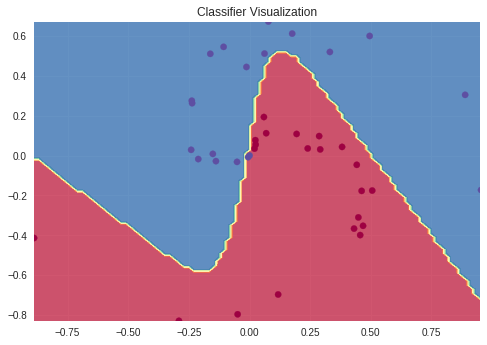

In [18]:
utils.vis_classifier_nn(X_test,yhat_test,param_dict,predict)